In [1]:
import os
ROOT = "/content/drive/MyDrive/one/ANN"
os.chdir(ROOT)


In [2]:
os.listdir()

['ANN_Demo.ipynb']

In [3]:
import tensorflow as tf # a low level APi


In [4]:
tf.__version__

'2.13.0'

In [5]:
import keras
print(keras.__version__)

2.14.0


In [6]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## A Simple Classifier using Kera's Sequential API

#### DATASET MNIST

```
* It is a dataset if handwritten digits each data point
* It 2D array of 28x28
* It has 10 classes of 0-9
* aka Hello World for ANN
```



In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import os

In [9]:
mnist = tf.keras.datasets.mnist
(X_train_full,y_train_full), (X_test , y_test) =  mnist.load_data()

In [10]:
X_train_full.shape , X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [11]:
X_test.shape , X_test.dtype

((10000, 28, 28), dtype('uint8'))

In [12]:
y_train_full.shape , y_train_full.dtype

((60000,), dtype('uint8'))

In [13]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [14]:
X_valid , X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid , y_train = y_train_full[:5000] , y_train_full[5000:]

X_test = X_test / 255.

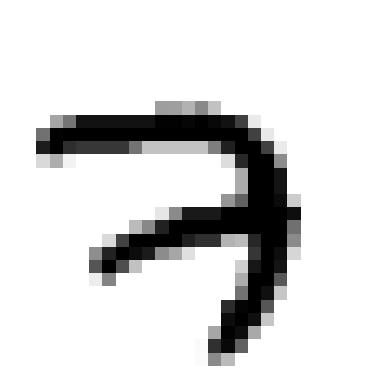

7

In [16]:
plt.imshow(X_train[0] , cmap = "binary")
plt.axis("off")
plt.show()

y_train[0]

<Axes: >

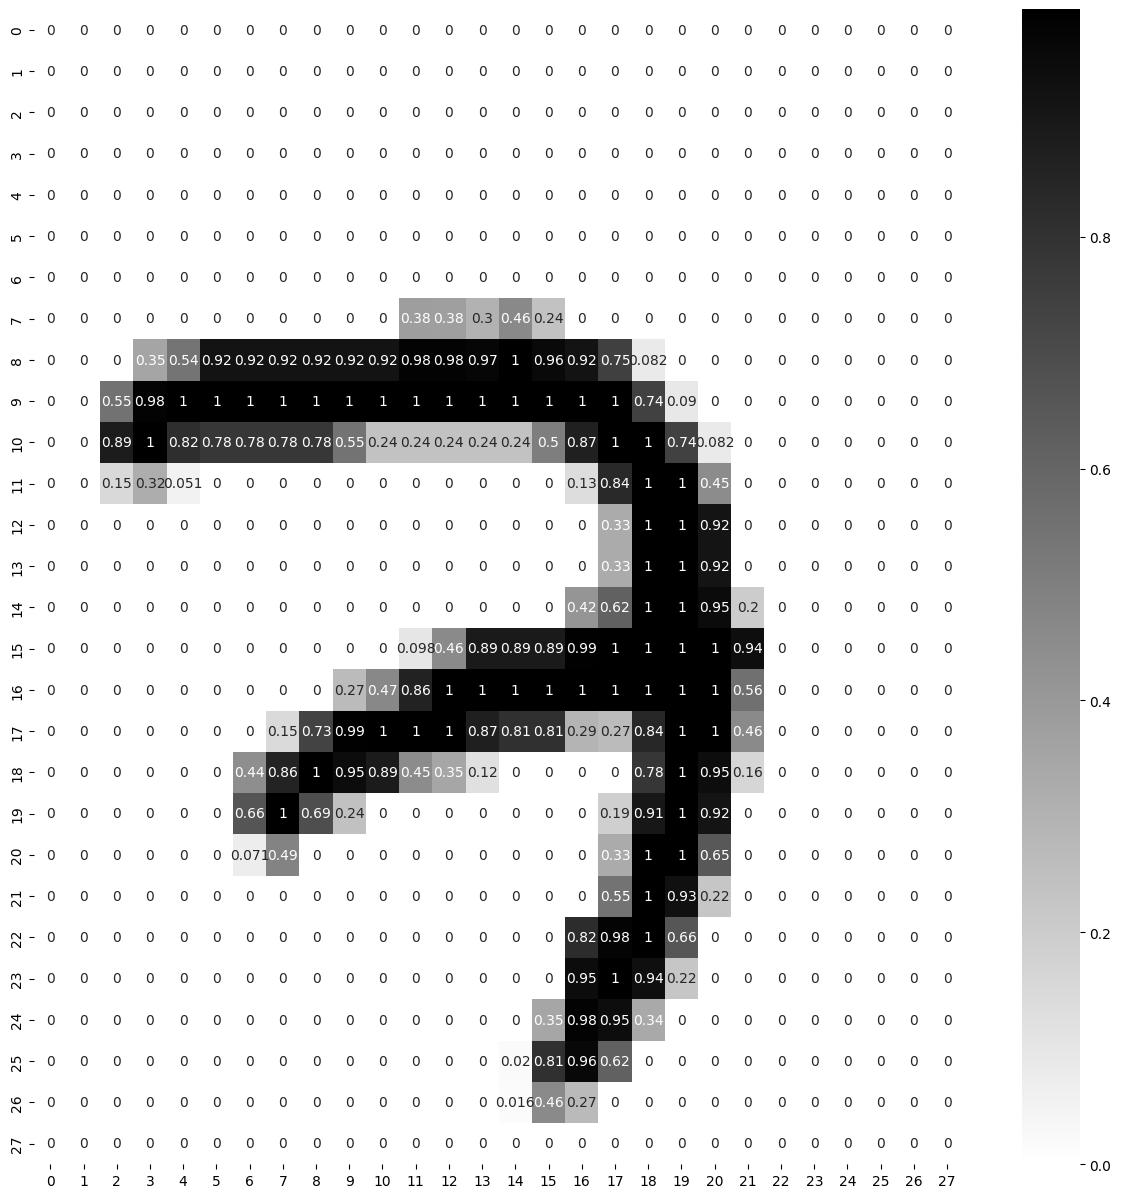

In [17]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0] , annot = True , cmap = "binary")

In [18]:
LAYERS = [
           tf.keras.layers.Flatten(input_shape = [28,28] , name = "imputLayer"),
           tf.keras.layers.Dense(300,activation="relu",name = "hiddenLayer1"),
           tf.keras.layers.Dense(100,activation="relu",name = "hiddenLayer2"),
           tf.keras.layers.Dense(10,activation="softmax",name = "OutputLayer"),
]

In [19]:
model = tf.keras.models.Sequential(LAYERS)

In [20]:
model.layers

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 imputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name)

In [23]:
hidden1.get_weights()

[array([[-0.05583408, -0.00445254, -0.02449988, ..., -0.03496245,
          0.05032476,  0.00317562],
        [-0.04186148,  0.03900625,  0.00701312, ...,  0.0403501 ,
          0.02681458, -0.00738874],
        [ 0.00755753, -0.06242185, -0.014121  , ...,  0.06377195,
         -0.02145188,  0.06369863],
        ...,
        [-0.0275156 ,  0.03996917, -0.0052161 , ...,  0.06669363,
          0.06876692, -0.07169609],
        [ 0.06764795,  0.01573058, -0.0636028 , ..., -0.02278285,
         -0.00609753,  0.03484644],
        [-0.07050281,  0.07216564, -0.07144455, ..., -0.03401397,
          0.0743169 , -0.0443749 ]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [24]:
weights , biases  = hidden1.get_weights()

In [25]:
weights.shape

(784, 300)

In [26]:
biases.shape

(300,)

 ***loss_function(actual,pred) = error***

In [27]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "SGD"
METRICS = ["accuracy"]

model.compile(loss = LOSS_FUNCTION,
              optimizer = OPTIMIZER,
              metrics = METRICS)

Important ⛔
Epochs: Integer.

Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

batch_size: Integer or None.

Number of samples per gradient update. If unspecified, batch_size will default to 32.

NOTE: Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

validation_batch_size: Integer or None.

Number of samples per validation batch.

If unspecified, will default to batch_size.

NOTE: Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).


In [33]:
EPOCHS = 30
VALIDATION_SET = (X_valid , y_valid)

history = model.fit(X_train , y_train , epochs = EPOCHS, validation_data = VALIDATION_SET)

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1265 - accuracy: 0.9641 - val_loss: 0.1223 - val_accuracy: 0.9676
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1150 - accuracy: 0.9664 - val_loss: 0.1140 - val_accuracy: 0.9702
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1052 - accuracy: 0.9705 - val_loss: 0.1114 - val_accuracy: 0.9674
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0967 - accuracy: 0.9730 - val_loss: 0.1031 - val_accuracy: 0.9718
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0893 - accuracy: 0.9753 - val_loss: 0.0967 - val_accuracy: 0.9734
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0826 - accuracy: 0.9767 - val_loss: 0.0917 - val_accuracy: 0.9744
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0772 - accuracy: 0.9786 - val_loss: 0.0924 - val_accuracy:

In [34]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0675 - accuracy: 0.9787


[0.0675315260887146, 0.9786999821662903]

In [35]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
loaded_model = tf.keras.models.load_model("model.h5")

In [37]:
loaded_model.evaluate(X_test , y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0675 - accuracy: 0.9787


[0.0675315260887146, 0.9786999821662903]

In [39]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.126518,0.964073,0.122299,0.9676
1,0.114967,0.966364,0.114019,0.9702
2,0.105174,0.970527,0.111431,0.9674
3,0.096717,0.972964,0.103104,0.9718
4,0.089279,0.975255,0.096701,0.9734
5,0.082627,0.976691,0.091671,0.9744
6,0.077176,0.978600,0.092430,0.9744
7,0.071791,0.979800,0.086349,0.9762
8,0.067237,0.981455,0.084331,0.9760
9,0.062975,0.982564,0.081977,0.9784


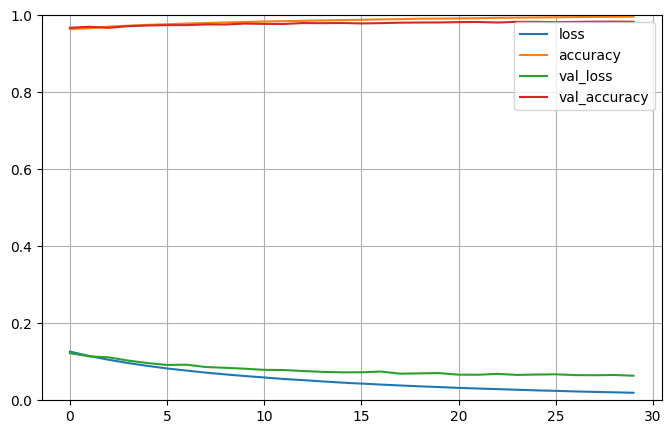

In [41]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [45]:
X_new = X_test[:3]
Y_new = y_test[:3]
y_probab = model.predict(X_new)
y_probab.round(2)

1/1 [==============================] - 0s 29ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [46]:
y_pred = np.argmax(y_probab , axis = -1)
y_pred ,Y_new

(array([7, 2, 1]), array([7, 2, 1], dtype=uint8))

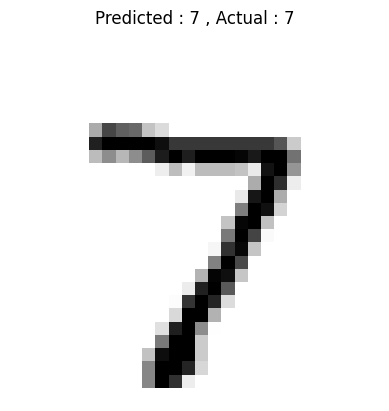

---


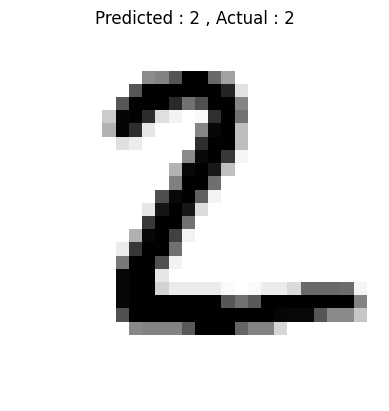

---


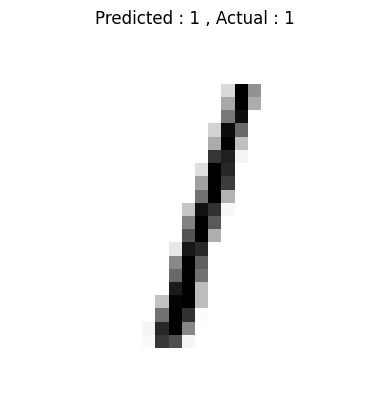

---


In [48]:
for data , pred , actual in zip(X_new , y_pred , Y_new):
  plt.imshow(data , cmap = "binary")
  plt.title(f"Predicted : {pred} , Actual : {actual}")
  plt.axis("off")
  plt.show()
  print("---")